<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Frequent_Value_Imputation(Handling_Categorical_Missing_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.sample(8)

,FireplaceQu,GarageQual,SalePrice
1314,TA,TA,119000
1447,TA,TA,240000
168,Gd,TA,183500
802,Gd,TA,189000
161,Gd,TA,412500
1219,NaN,NaN,91500
1145,Gd,TA,149000
651,Gd,Fa,108000


In [ ]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

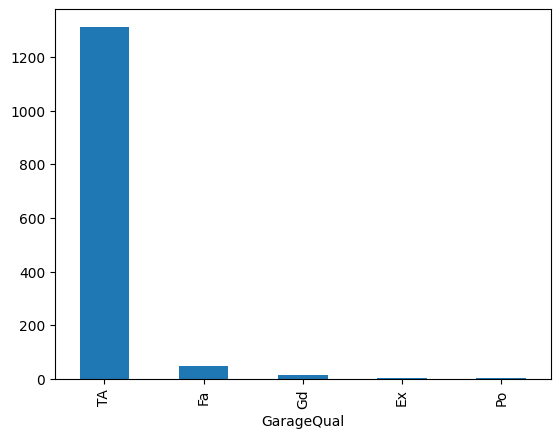

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

In [ ]:
df['GarageQual'].mode()

,GarageQual
0,TA


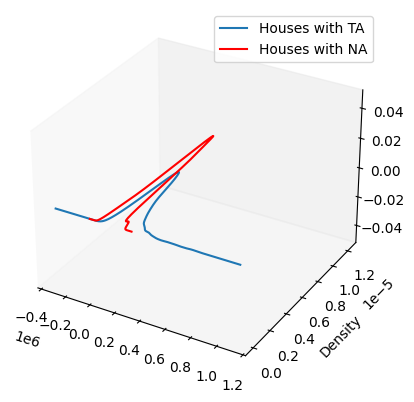

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

<Axes: xlabel='GarageQual'>

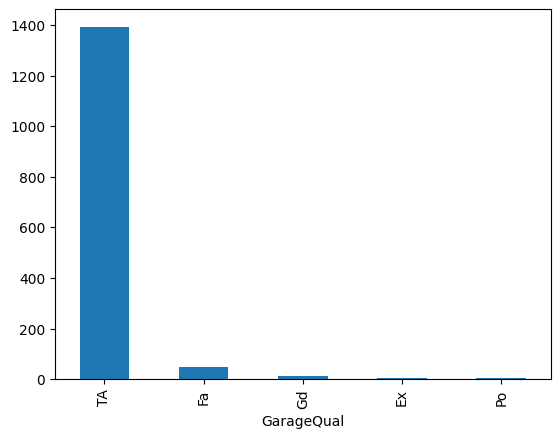

In [ ]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA',inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

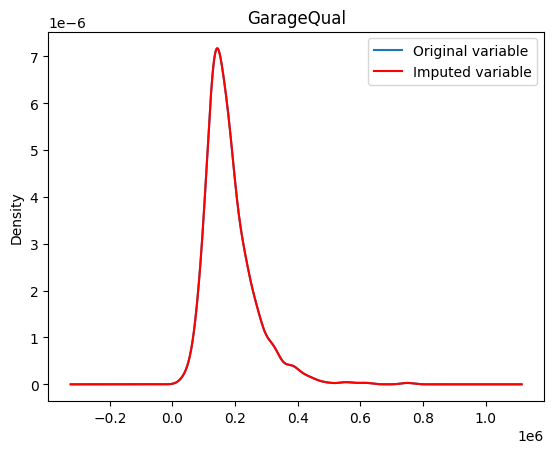

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

In [ ]:
df['FireplaceQu'].isnull().value_counts()

,count
FireplaceQu,
False,770
True,690


In [ ]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

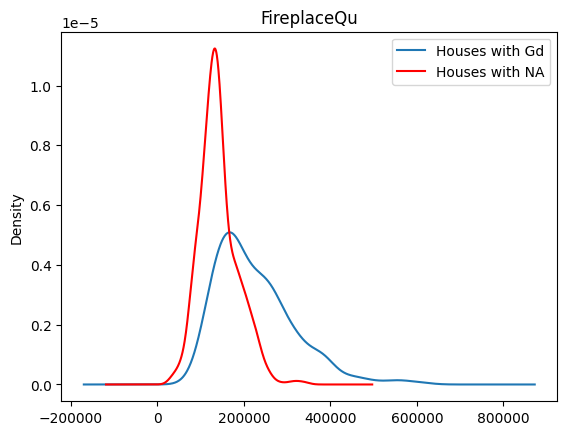

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [ ]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [ ]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<ipython-input-24-de2b1eab0580>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

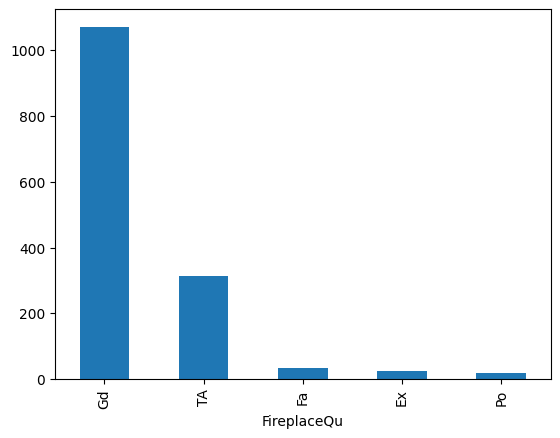

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

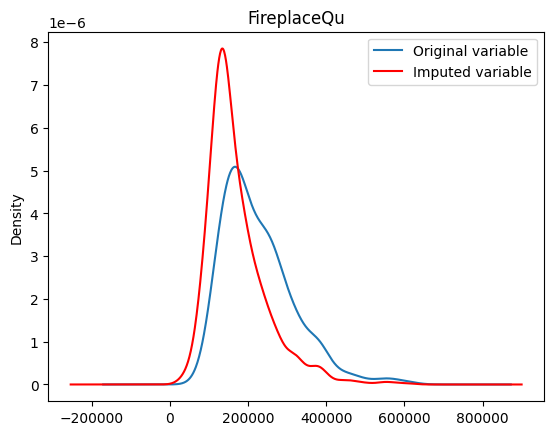

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)